In [383]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

In [384]:
# pip install category_encoders

In [456]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, silhouette_samples, silhouette_score 

In [457]:
df = pd.read_excel(r'deals.xlsx')

# Data Exploration

In [458]:
df.head()

,DEAL ID,PORTFOLIO COMPANY ID,PORTFOLIO COMPANY,PORTFOLIO COMPANY COUNTRY,DEAL DATE,DEAL STATUS,STAGE,INVESTORS / BUYERS (FIRMS),PRIMARY INDUSTRY,DEAL CURRENCY,...,BOARD REPRESENTATIVES,INDUSTRY VERTICALS,INDUSTRY CLASSIFICATION,PORTFOLIO COMPANY STATUS,INVESTOR STATE/ COUNTY,INVESTOR CITY,INVESTOR REGION,PORTFOLIO COMPANY STATE/ COUNTY,PORTFOLIO COMPANY CITY,PORTFOLIO COMPANY REGION
0,V241641,422955,"Siren Marine, Inc.",US,2021-03-22,Completed,Unspecified Round,Yamaha Motor Ventures & Laboratory Silicon Valley,Ship Building & Repair,NaN,...,NaN,Mobile Apps,Industrials,Active,CA,Palo Alto,North America,Rhode Island,Newport,North America
1,V241792,232453,"Fortem Technologies, Inc.",US,2021-03-22,Completed,Unspecified Round,Toshiba Infrastructure Systems & Solutions Cor...,Software,USD,...,NaN,"Drones, IoT (Internet of Things), Machine Lear...",Information Technology,Active,NaN,NaN,NaN,UT,Pleasant Grove,North America
2,V241341,421074,Junify Corporation,US,2021-03-17,Completed,Seed,Infinity Ventures,Software,JPY,...,NaN,Mobile Apps,Information Technology,Active,NaN,Tokyo,Asia,California,NaN,North America
3,V241508,396814,"Allonnia, LLC",US,2021-03-17,Completed,Unspecified Round,Evok Innovations,Power & Utilities,USD,...,NaN,NaN,Energy & Utilities,Active,British Columbia,Vancouver,North America,MA,Boston,North America
4,V241648,186582,Vyopta Incorporated,US,2021-03-16,Completed,Growth Capital/Expansion,Vistara Capital Partners,Software,USD,...,NaN,Big Data,Information Technology,Active,BC,Vancouver,North America,TX,Austin,North America


In [459]:
# for column in df:
#     print(column)

In [389]:
df.describe()

,PORTFOLIO COMPANY ID,DEAL SIZE (CURR. MN),DEAL SIZE (USD MN),COMPANY REVENUE (CURR. MN),ENTRY REVENUE MULTIPLE,EBITDA (CURR. MN),ENTRY EBITDA MULTIPLE
count,19017.000000,15334.000000,15334.000000,181.000000,156.000000,147.000000,132.000000
mean,276146.022927,44.206791,32.330310,617.035304,100.261090,114.079184,-4.694773
std,96464.468641,683.186257,140.705245,3163.787796,760.504578,2576.900920,49.978655
min,25996.000000,0.000000,0.000000,0.000000,0.000000,-9351.000000,-464.040000
25%,206578.000000,2.600000,2.600000,10.000000,0.440000,-69.750000,-4.655000
50%,292411.000000,7.600000,7.500000,57.260000,1.220000,-21.500000,-1.640000
75%,358439.000000,24.485000,23.852500,200.000000,3.955000,-9.255000,-0.630000
max,423146.000000,76000.000000,6500.000000,40653.000000,8500.000000,24913.000000,300.000000


In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19017 entries, 0 to 19016
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   DEAL ID                          19017 non-null  object        
 1   PORTFOLIO COMPANY ID             19017 non-null  int64         
 2   PORTFOLIO COMPANY                19017 non-null  object        
 3   PORTFOLIO COMPANY COUNTRY        19017 non-null  object        
 4   DEAL DATE                        19017 non-null  datetime64[ns]
 5   DEAL STATUS                      19017 non-null  object        
 6   STAGE                            19017 non-null  object        
 7   INVESTORS / BUYERS (FIRMS)       15407 non-null  object        
 8   PRIMARY INDUSTRY                 19017 non-null  object        
 9   DEAL CURRENCY                    15579 non-null  object        
 10  DEAL SIZE (CURR. MN)             15334 non-null  float64  

In [391]:
df = df.rename(columns = {"INVESTORS / BUYERS (FIRMS)": "investors"})

In [393]:
df["STAGE"].unique()

array(['Unspecified Round', 'Seed', 'Growth Capital/Expansion',
       'Series C/Round 3', 'Series D/Round 4', 'Series B/Round 2',
       'Series A/Round 1', 'Series E/Round 5', 'Series H/Round 8',
       'Pre-IPO', 'Add-on', 'Series F/Round 6', 'Venture Debt', 'PIPE',
       'Grant', 'Secondary Stock Purchase', 'Merger', 'Angel',
       'Series G/Round 7', 'Series I/Round 9', 'Series J/Round 10'],
      dtype=object)

In [394]:
df["PORTFOLIO COMPANY STATUS"].unique()

array(['Active', 'Realised', nan], dtype=object)

In [395]:
df = df.fillna(0)

In [396]:
df.head()

,DEAL ID,PORTFOLIO COMPANY ID,PORTFOLIO COMPANY,PORTFOLIO COMPANY COUNTRY,DEAL DATE,DEAL STATUS,STAGE,investors,PRIMARY INDUSTRY,DEAL CURRENCY,...,BOARD REPRESENTATIVES,INDUSTRY VERTICALS,INDUSTRY CLASSIFICATION,PORTFOLIO COMPANY STATUS,INVESTOR STATE/ COUNTY,INVESTOR CITY,INVESTOR REGION,PORTFOLIO COMPANY STATE/ COUNTY,PORTFOLIO COMPANY CITY,PORTFOLIO COMPANY REGION
0,V241641,422955,"Siren Marine, Inc.",US,2021-03-22,Completed,Unspecified Round,Yamaha Motor Ventures & Laboratory Silicon Valley,Ship Building & Repair,0,...,0,Mobile Apps,Industrials,Active,CA,Palo Alto,North America,Rhode Island,Newport,North America
1,V241792,232453,"Fortem Technologies, Inc.",US,2021-03-22,Completed,Unspecified Round,Toshiba Infrastructure Systems & Solutions Cor...,Software,USD,...,0,"Drones, IoT (Internet of Things), Machine Lear...",Information Technology,Active,0,0,0,UT,Pleasant Grove,North America
2,V241341,421074,Junify Corporation,US,2021-03-17,Completed,Seed,Infinity Ventures,Software,JPY,...,0,Mobile Apps,Information Technology,Active,0,Tokyo,Asia,California,0,North America
3,V241508,396814,"Allonnia, LLC",US,2021-03-17,Completed,Unspecified Round,Evok Innovations,Power & Utilities,USD,...,0,0,Energy & Utilities,Active,British Columbia,Vancouver,North America,MA,Boston,North America
4,V241648,186582,Vyopta Incorporated,US,2021-03-16,Completed,Growth Capital/Expansion,Vistara Capital Partners,Software,USD,...,0,Big Data,Information Technology,Active,BC,Vancouver,North America,TX,Austin,North America


In [397]:
df["DEAL STATUS"].unique()

array(['Completed', 'Bidding', 'Announced', 'Rejected', 'Abandoned'],
      dtype=object)

In [398]:
df.drop(columns = ["BOARD REPRESENTATIVES", "DEAL ID", "PORTFOLIO COMPANY ID", "PORTFOLIO COMPANY COUNTRY", "PORTFOLIO COMPANY REGION"])

,PORTFOLIO COMPANY,DEAL DATE,DEAL STATUS,STAGE,investors,PRIMARY INDUSTRY,DEAL CURRENCY,DEAL SIZE (CURR. MN),DEAL SIZE (USD MN),INVESTOR COUNTRY,...,ENTRY EBITDA MULTIPLE,BOUGHT FROM / SELLERS (FIRMS),INDUSTRY VERTICALS,INDUSTRY CLASSIFICATION,PORTFOLIO COMPANY STATUS,INVESTOR STATE/ COUNTY,INVESTOR CITY,INVESTOR REGION,PORTFOLIO COMPANY STATE/ COUNTY,PORTFOLIO COMPANY CITY
0,"Siren Marine, Inc.",2021-03-22,Completed,Unspecified Round,Yamaha Motor Ventures & Laboratory Silicon Valley,Ship Building & Repair,0,0.00,0.00,US,...,0.0,0,Mobile Apps,Industrials,Active,CA,Palo Alto,North America,Rhode Island,Newport
1,"Fortem Technologies, Inc.",2021-03-22,Completed,Unspecified Round,Toshiba Infrastructure Systems & Solutions Cor...,Software,USD,15.00,15.00,0,...,0.0,0,"Drones, IoT (Internet of Things), Machine Lear...",Information Technology,Active,0,0,0,UT,Pleasant Grove
2,Junify Corporation,2021-03-17,Completed,Seed,Infinity Ventures,Software,JPY,10.00,0.09,Japan,...,0.0,0,Mobile Apps,Information Technology,Active,0,Tokyo,Asia,California,0
3,"Allonnia, LLC",2021-03-17,Completed,Unspecified Round,Evok Innovations,Power & Utilities,USD,20.00,20.00,Canada,...,0.0,0,0,Energy & Utilities,Active,British Columbia,Vancouver,North America,MA,Boston
4,Vyopta Incorporated,2021-03-16,Completed,Growth Capital/Expansion,Vistara Capital Partners,Software,USD,8.00,8.00,Canada,...,0.0,0,Big Data,Information Technology,Active,BC,Vancouver,North America,TX,Austin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19012,Vicarious Surgical Inc.,2018-03-26,Completed,Series A/Round 1,"AME Cloud Ventures, Gates Ventures, Innovation...",Healthcare IT,USD,16.75,16.75,US,...,0.0,0,"HealthTech, Robotics, Virtual Reality (VR)",Healthcare,Active,CA,"Palo Alto, Menlo Park",North America,MA,Charlestown
19013,Uber's Southeast Asian Operations,2018-03-25,Completed,Add-on,"Toyota Tsusho Corporation, Tiger Global Manage...",Transportation Services,0,0.00,0.00,"Japan, US, South Korea, Singapore, China, Indo...",...,0.0,0,"E-commerce, FinTech, Mobile Apps",Consumer Discretionary,Active,"Aichi, NY, CA","Nagoya-shi, New York, San Francisco, Seoul, Mi...","Asia, North America",CA,San Francisco
19014,Denim LA Inc.,2018-03-25,Completed,Unspecified Round,SeedInvest,Retail,USD,3.20,3.20,US,...,0.0,0,"E-commerce, Paas",Consumer Discretionary,Active,NY,New York,North America,CA,Vernon
19015,"StreetOne, Inc.",2018-03-24,Completed,Seed,0,Internet,USD,0.50,0.50,0,...,0.0,0,0,Information Technology,Active,0,0,0,NJ,East Brunswick


In [399]:
encoder=ce.OneHotEncoder(cols=['DEAL STATUS'],handle_unknown='return_nan',return_df=True,use_cat_names=True)


In [400]:
data_encoded = encoder.fit_transform(df)
data_encoded.head()

,DEAL ID,PORTFOLIO COMPANY ID,PORTFOLIO COMPANY,PORTFOLIO COMPANY COUNTRY,DEAL DATE,DEAL STATUS_Completed,DEAL STATUS_Bidding,DEAL STATUS_Announced,DEAL STATUS_Rejected,DEAL STATUS_Abandoned,...,BOARD REPRESENTATIVES,INDUSTRY VERTICALS,INDUSTRY CLASSIFICATION,PORTFOLIO COMPANY STATUS,INVESTOR STATE/ COUNTY,INVESTOR CITY,INVESTOR REGION,PORTFOLIO COMPANY STATE/ COUNTY,PORTFOLIO COMPANY CITY,PORTFOLIO COMPANY REGION
0,V241641,422955,"Siren Marine, Inc.",US,2021-03-22,1.0,0.0,0.0,0.0,0.0,...,0,Mobile Apps,Industrials,Active,CA,Palo Alto,North America,Rhode Island,Newport,North America
1,V241792,232453,"Fortem Technologies, Inc.",US,2021-03-22,1.0,0.0,0.0,0.0,0.0,...,0,"Drones, IoT (Internet of Things), Machine Lear...",Information Technology,Active,0,0,0,UT,Pleasant Grove,North America
2,V241341,421074,Junify Corporation,US,2021-03-17,1.0,0.0,0.0,0.0,0.0,...,0,Mobile Apps,Information Technology,Active,0,Tokyo,Asia,California,0,North America
3,V241508,396814,"Allonnia, LLC",US,2021-03-17,1.0,0.0,0.0,0.0,0.0,...,0,0,Energy & Utilities,Active,British Columbia,Vancouver,North America,MA,Boston,North America
4,V241648,186582,Vyopta Incorporated,US,2021-03-16,1.0,0.0,0.0,0.0,0.0,...,0,Big Data,Information Technology,Active,BC,Vancouver,North America,TX,Austin,North America


In [401]:
target = data_encoded["DEAL SIZE (USD MN)"]

In [402]:
import numpy as np
np.shape(data_encoded)

(19017, 32)

In [403]:
col = []
for column in data_encoded:
    unique_vals = len(data_encoded[column].unique())
    if unique_vals > 30:
        print(column)
        col = np.append(col, column)

DEAL ID
PORTFOLIO COMPANY ID
PORTFOLIO COMPANY
DEAL DATE
investors
PRIMARY INDUSTRY
DEAL SIZE (CURR. MN)
DEAL SIZE (USD MN)
INVESTOR COUNTRY
COMPANY REVENUE (CURR. MN)
ENTRY REVENUE MULTIPLE
EBITDA (CURR. MN)
ENTRY EBITDA MULTIPLE
BOUGHT FROM / SELLERS (FIRMS)
BOARD REPRESENTATIVES
INDUSTRY VERTICALS
INVESTOR STATE/ COUNTY
INVESTOR CITY
INVESTOR REGION
PORTFOLIO COMPANY STATE/ COUNTY
PORTFOLIO COMPANY CITY


In [404]:
len(data_encoded["PRIMARY INDUSTRY"].unique())
#len(data_encoded)

52

In [405]:
features = data_encoded.drop(col, axis = 1)
features["PRIMARY INDUSTRY"] = data_encoded["PRIMARY INDUSTRY"]

In [406]:
from sklearn.linear_model import LinearRegression

In [407]:
testing = data_encoded.drop(columns = col, axis=1)

In [408]:
features = data_encoded

In [409]:
col = col[1:len(col)]
print(features.iloc[1:])
target = data_encoded["DEAL SIZE (USD MN)"]

       DEAL ID  PORTFOLIO COMPANY ID                  PORTFOLIO COMPANY  \
1      V241792                232453          Fortem Technologies, Inc.   
2      V241341                421074                 Junify Corporation   
3      V241508                396814                      Allonnia, LLC   
4      V241648                186582                Vyopta Incorporated   
5      V241659                296923                  Courier Plus Inc.   
...        ...                   ...                                ...   
19012  V145290                273459            Vicarious Surgical Inc.   
19013  V152902                287495  Uber's Southeast Asian Operations   
19014  V224691                155273                      Denim LA Inc.   
19015  V143946                270419                    StreetOne, Inc.   
19016  V224466                228898            Verdex Technology Inc.    

      PORTFOLIO COMPANY COUNTRY  DEAL DATE  DEAL STATUS_Completed  \
1                            U

In [410]:
for column in features:
    print(column)

DEAL ID
PORTFOLIO COMPANY ID
PORTFOLIO COMPANY
PORTFOLIO COMPANY COUNTRY
DEAL DATE
DEAL STATUS_Completed
DEAL STATUS_Bidding
DEAL STATUS_Announced
DEAL STATUS_Rejected
DEAL STATUS_Abandoned
STAGE
investors
PRIMARY INDUSTRY
DEAL CURRENCY
DEAL SIZE (CURR. MN)
DEAL SIZE (USD MN)
INVESTOR COUNTRY
COMPANY REVENUE (CURR. MN)
ENTRY REVENUE MULTIPLE
EBITDA (CURR. MN)
ENTRY EBITDA MULTIPLE
BOUGHT FROM / SELLERS (FIRMS)
BOARD REPRESENTATIVES
INDUSTRY VERTICALS
INDUSTRY CLASSIFICATION
PORTFOLIO COMPANY STATUS
INVESTOR STATE/ COUNTY
INVESTOR CITY
INVESTOR REGION
PORTFOLIO COMPANY STATE/ COUNTY
PORTFOLIO COMPANY CITY
PORTFOLIO COMPANY REGION


In [411]:
features = features.drop(columns=["PORTFOLIO COMPANY COUNTRY"])

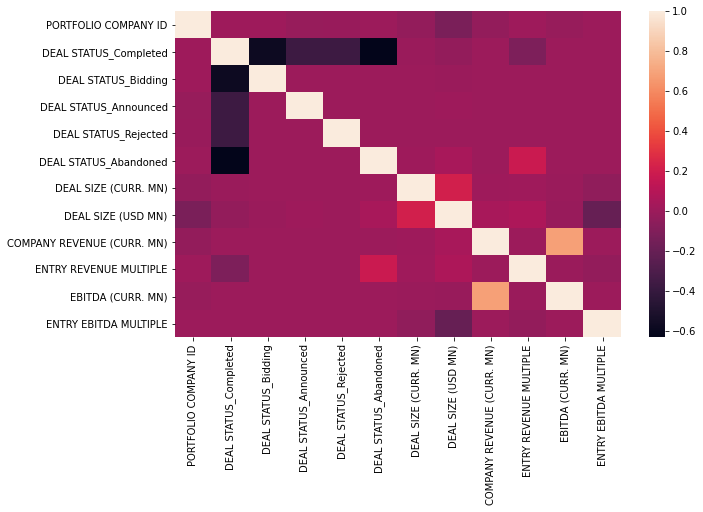

In [412]:
corrs = features.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corrs)
plt.show()

In [413]:
# encoder=ce.OneHotEncoder(cols=['PORTFOLIO COMPANY STATUS', 'PORTFOLIO COMPANY REGION', 'PORTFOLIO COMPANY COUNTRY'],handle_unknown='return_nan',return_df=True,use_cat_names=True)



In [414]:
# features = encoder.fit_transform(features)
features.head()

,DEAL ID,PORTFOLIO COMPANY ID,PORTFOLIO COMPANY,DEAL DATE,DEAL STATUS_Completed,DEAL STATUS_Bidding,DEAL STATUS_Announced,DEAL STATUS_Rejected,DEAL STATUS_Abandoned,STAGE,...,BOARD REPRESENTATIVES,INDUSTRY VERTICALS,INDUSTRY CLASSIFICATION,PORTFOLIO COMPANY STATUS,INVESTOR STATE/ COUNTY,INVESTOR CITY,INVESTOR REGION,PORTFOLIO COMPANY STATE/ COUNTY,PORTFOLIO COMPANY CITY,PORTFOLIO COMPANY REGION
0,V241641,422955,"Siren Marine, Inc.",2021-03-22,1.0,0.0,0.0,0.0,0.0,Unspecified Round,...,0,Mobile Apps,Industrials,Active,CA,Palo Alto,North America,Rhode Island,Newport,North America
1,V241792,232453,"Fortem Technologies, Inc.",2021-03-22,1.0,0.0,0.0,0.0,0.0,Unspecified Round,...,0,"Drones, IoT (Internet of Things), Machine Lear...",Information Technology,Active,0,0,0,UT,Pleasant Grove,North America
2,V241341,421074,Junify Corporation,2021-03-17,1.0,0.0,0.0,0.0,0.0,Seed,...,0,Mobile Apps,Information Technology,Active,0,Tokyo,Asia,California,0,North America
3,V241508,396814,"Allonnia, LLC",2021-03-17,1.0,0.0,0.0,0.0,0.0,Unspecified Round,...,0,0,Energy & Utilities,Active,British Columbia,Vancouver,North America,MA,Boston,North America
4,V241648,186582,Vyopta Incorporated,2021-03-16,1.0,0.0,0.0,0.0,0.0,Growth Capital/Expansion,...,0,Big Data,Information Technology,Active,BC,Vancouver,North America,TX,Austin,North America


In [415]:
X = np.array(features)
y = np.array(target)

In [416]:
X.shape

(19017, 31)

In [417]:
y.shape

(19017,)

In [418]:
X_train

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [419]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 


In [420]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.coef_)
print(reg.intercept_)

ValueError: could not convert string to float: 'V168845'

In [ ]:
in_sample_preds = reg.predict(X_train)
out_sample_preds = reg.predict(X_test)

In [ ]:
new = features.corr()

In [ ]:
print("In-Sample R2: ", r2_score(y_train, in_sample_preds))
print("Out-Sample R2: ", r2_score(y_test, out_sample_preds))
print()
print("In-Sample MSE: ", mean_squared_error(y_train, in_sample_preds))
print("Out-Sample MSE: ", mean_squared_error(y_test, out_sample_preds))
print()
print("In-Sample MAE: ", mean_absolute_error(y_train, in_sample_preds))
print("Out-Sample MAE: ", mean_absolute_error(y_test, out_sample_preds))

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, out_sample_preds)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

In [422]:
from sklearn.cluster import KMeans

In [423]:
df.groupby(by=["investors"]).mean()[["DEAL SIZE (USD MN)"]]

,DEAL SIZE (USD MN)
investors,
0,9.71556
"+ND Capital, Qiming Venture Partners, Clough Capital Partners, AJU IB Investment, Korys, Kaitai Capital, Industrial Investors, MPM Capital, Tekla Capital Management, Nawton Limited",62.00000
".406 Ventures, Accomplice, Pillar Capital",11.00000
".406 Ventures, Bain Capital Ventures, Hudson Structured Capital Management",10.00000
".406 Ventures, Cigna Ventures, MemorialCare Innovation Fund, Ascension Ventures",24.00000
...,...
"v1.vc, SK Ventures, Powerhouse Ventures, Notation Capital, Intelis Capital, LLC , Climate Capital, BlackHorn Ventures",2.00000
"ward.ventures, KCRise Fund, Greycroft Partners, IrishAngels, Elysian Park Ventures, SeventySix Capital",10.40000
xSquared Ventures,1.50000


In [429]:
df["splitinvestors"] = df["investors"].str.split(",")

In [436]:
df["splitinvestors"].loc[19012][0]

'AME Cloud Ventures'

In [442]:
df["splitinvestors"].fillna([])

TypeError: "value" parameter must be a scalar or dict, but you passed a "list"

In [439]:
df["investors"]

0        Yamaha Motor Ventures & Laboratory Silicon Valley
1        Toshiba Infrastructure Systems & Solutions Cor...
2                                        Infinity Ventures
3                                         Evok Innovations
4                                 Vistara Capital Partners
                               ...                        
19012    AME Cloud Ventures, Gates Ventures, Innovation...
19013    Toyota Tsusho Corporation, Tiger Global Manage...
19014                                           SeedInvest
19015                                                    0
19016                                                 SOSV
Name: investors, Length: 19017, dtype: object

In [444]:
#number of investors per deal

df[["DEAL ID", "investors", "DEAL SIZE (USD MN)"]].head()

df["splitinvestors"].apply(lambda x: len(x) if type(x) == list else 0)

0         1
1         1
2         1
3         1
4         1
         ..
19012     4
19013    17
19014     1
19015     0
19016     1
Name: splitinvestors, Length: 19017, dtype: int64

In [451]:
# loop thru splitinvestors - new list 
firms = []
dealsize = []
count = 0

for row in df["splitinvestors"]:
    if type(row) != list: 
        continue
    for investor in row: 
        firms.append(investor)
        dealsize.append(df.loc[count, "DEAL SIZE (USD MN)"])
    count += 1

15407